In [2]:
import Simulation.pys.para.initial_para as Cp
import Simulation.pys.para.model_para as Mp
import Simulation.pys.full_sim.cosmo2cl as Cl
import Simulation.pys.full_sim.cl2realization as realization
import matplotlib.pyplot as plt
from time import time
from importlib import reload
import pickle as pkl
from astropy import units as u

100%|██████████| 40/40 [00:01<00:00, 28.77it/s]


In [3]:
para_C = Cp.prior_cosmo_Gaussian()
para_D = Cp.prior_EBV()

85.88762283325195


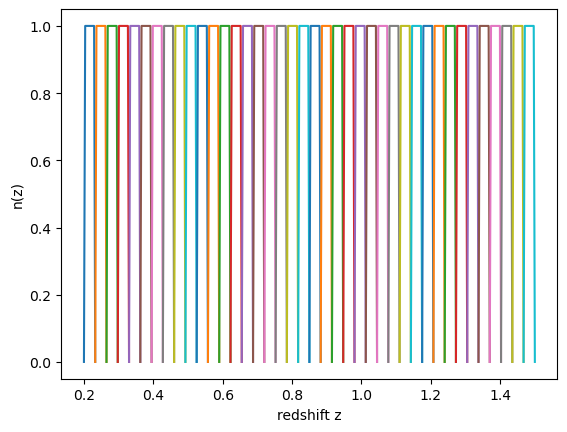

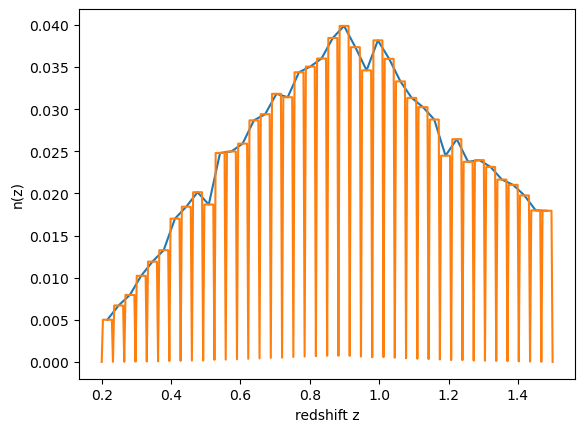

In [4]:
start = time()
shell = Cl.Shell_Cls(para_C, Mp.zbin_in,upper_f=0.8, plot=True)
shell_cl = shell.cls_shell_theory(Mp.lmax)
plt.figure()
total_cl_nowin = shell.cls_total_theory_nowin(Mp.lmax, Mp.Ncount_hist, plot=True)
total_cl_win = shell.cls_total_theory_withwin(Mp.lmax, Mp.Ncount_hist, plot=True)
end = time()
print(end-start)

In [5]:
import numpy as np
np.shape(shell_cl)

(820, 1025)

In [6]:
# np.save('../../data/test_model/camb_40cls.npy', shell_cl) 

/Users/River/PycharmProjects/ExtinctionSim_3pip/Simulation/pys/full_sim/cosmo2cl.py:44: RuntimeWarning: invalid value encountered in divide
  ax2.plot((Cl1 - Cl2) / Cl1, color='red', label = r"1 - Cl$_{2}$/Cl$_{1}$")


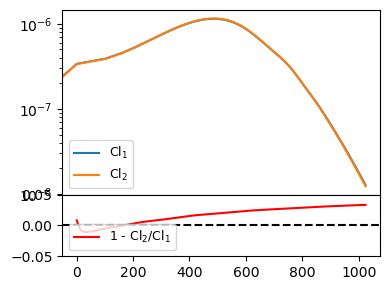

In [7]:
Cl.Compare_Cls(total_cl_win, total_cl_nowin)

In [8]:
G = realization.GenerateShell(40, shell_cl, Mp.lmax, Mp.nside)
Density_map_shell = G.realization_density(lognormal=True)
R = realization.Realization_i(Density_map_shell, G)

In [9]:
# np.save('../../data/test_model/camb_40gls.npy', G.gls) 

100%|██████████| 40/40 [00:05<00:00,  7.87it/s]


array([[7.52316385e-35, 1.28387100e-03, 1.24814505e-04, ...,
        4.31915875e-07, 4.39565045e-07, 4.31801944e-07],
       [1.73815177e-32, 1.19496311e-05, 3.63355264e-04, ...,
        4.70298537e-07, 4.49279400e-07, 4.24818343e-07],
       [2.02343015e-32, 2.65224739e-04, 2.35400713e-04, ...,
        4.64443557e-07, 5.07502454e-07, 4.45221543e-07],
       ...,
       [9.21587571e-36, 1.05819767e-04, 8.21405030e-05, ...,
        4.55077471e-07, 4.89518756e-07, 4.83141198e-07],
       [1.81619637e-32, 5.40734323e-05, 3.32250066e-05, ...,
        4.87820928e-07, 4.96828911e-07, 4.90992065e-07],
       [1.69271187e-36, 1.98563548e-04, 2.91114186e-05, ...,
        5.06279666e-07, 4.75714141e-07, 4.87026701e-07]], shape=(8, 1024))

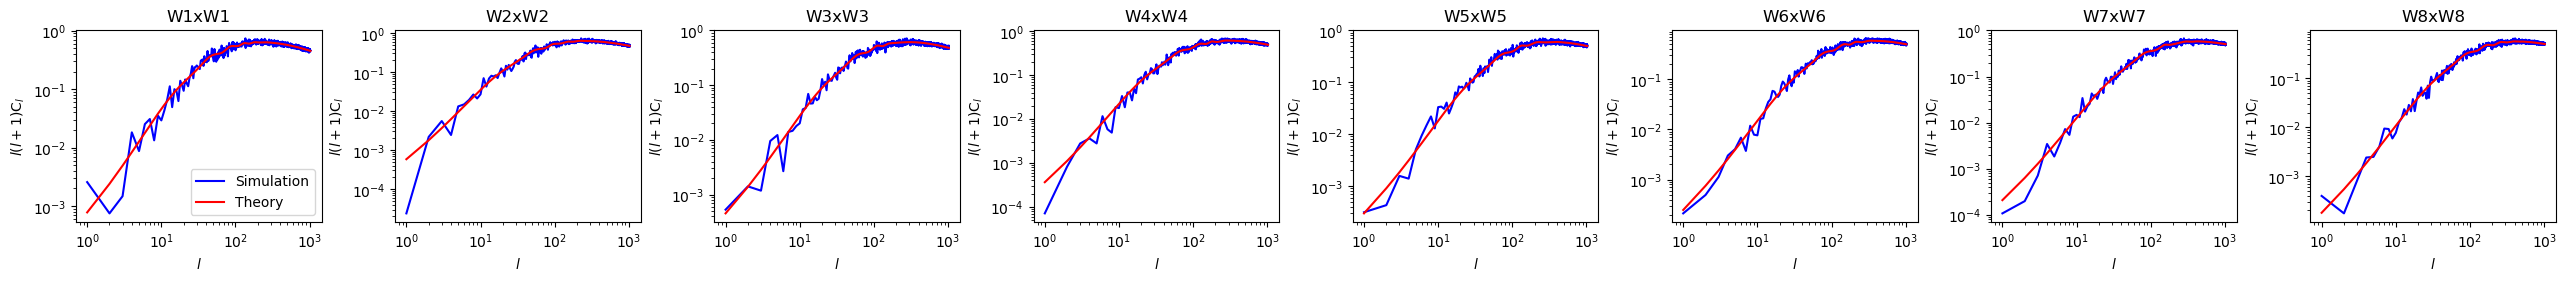

In [10]:
R.calculate_cls_auto([1,2,3,4,5,6,7,8], Mp.lmax, plot = True, Poisson = True)

100%|██████████| 40/40 [00:05<00:00,  7.78it/s]


[[1, 1], [2, 2], [2, 1], [3, 3], [3, 2], [3, 1]]

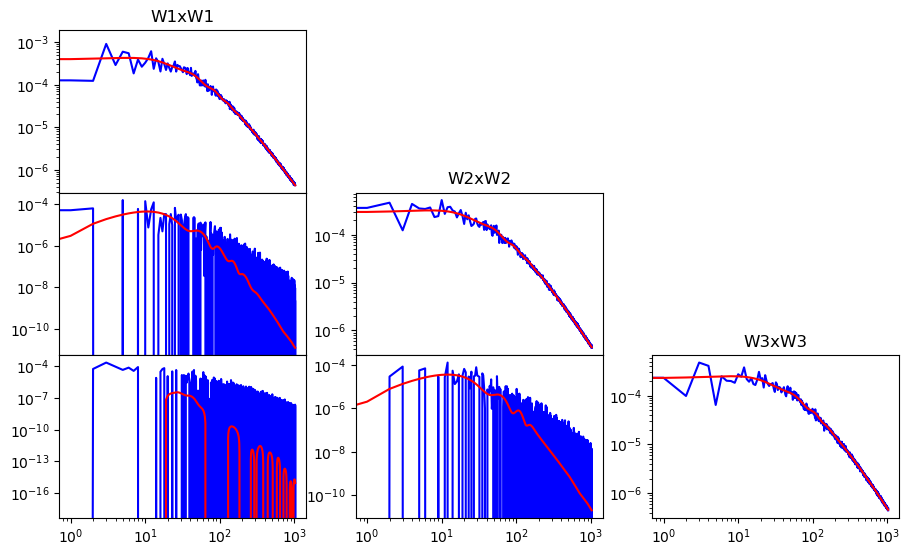

In [11]:
R.calculate_cls_all([1,2,3], Mp.lmax, plot = True, Poisson = True)

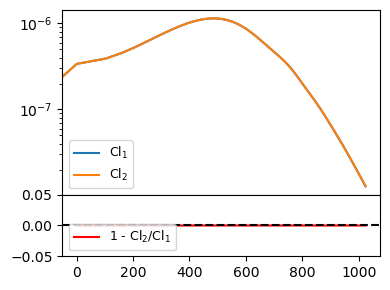

In [12]:
total_cl_lc= shell.cls_total_linear_combination(shell_cl, G.cls_label_glass,Mp.Ncount_hist)
Cl.Compare_Cls(total_cl_win, total_cl_lc)


In [15]:
cosmo_pack = {"density_map":Density_map_shell,
              "cl_label": G.cls_label_glass,
              "cl_shell": shell_cl,
              "cosmo_p": para_C}

In [16]:
# with open('../../data/test_model/test_cosmo_pack.pkl', 'wb') as f:
#     pkl.dump(cosmo_pack, f)

    
